In [24]:
# Multi-Class Logistic Regression with Gradient Descent
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('wine_dataset.csv')

In [25]:
display(data)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [59]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import seaborn as sns

In [27]:
print(np.unique(data['style']))

['red' 'white']


In [39]:
#encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit([['red',0],['white',1]])
mapping ={"red":0, "white":1}

In [43]:
data['style'] = data['style'].map(mapping)

In [44]:
data['style']

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: style, Length: 6497, dtype: int64

In [47]:
model = LogisticRegression()
X = data.drop('style',axis=1)
y = data['style']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
#Q4
sample = data[1:2]
sample = sample.drop('style',axis=1)
sample_prediction = model.predict(sample)
r_map ={0:"red", 1:"white"}
print("Sample belongs to: ",sample_prediction, r_map[sample_prediction[0]])

Sample belongs to:  [0] red


<Axes: >

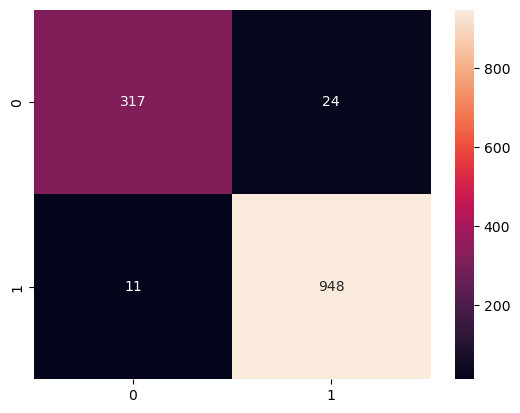

In [60]:
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d')

In [64]:
#Q5
accuracy = accuracy_score(y_test, y_pred)
print("Metrics\nAccuracy:",accuracy)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("F1 score:",f1)
print("Precision:", precision)
recall = recall_score(y_test, y_pred)
print("Recall score:",recall)

Metrics
Accuracy: 0.9730769230769231
F1 score: 0.9818746763335059
Precision: 0.9753086419753086
Recall score: 0.9885297184567258
